<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/NB_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_train = pd.read_csv('/content/SalaryData_Train.csv')
salary_test = pd.read_csv('/content/SalaryData_Test.csv')

In [3]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [4]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
string_columns = [	'workclass',	'education','maritalstatus',	'occupation',	'relationship',	'race',	'sex'	,'native']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_enc = LabelEncoder()

In [13]:
for i in string_columns:
  salary_train[i] = label_enc.fit_transform(salary_train[i])
  salary_test[i] = label_enc.fit_transform(salary_test[i])


In [14]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [15]:
train_x = salary_train.iloc[:,0:13]
train_y = salary_train.iloc[:,[13]]
test_x = salary_test.iloc[:,0:13]
test_y = salary_test.iloc[:,[13]]

In [16]:
train_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [17]:
train_y

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
30156,<=50K
30157,>50K
30158,<=50K
30159,<=50K


In [18]:
train_x.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
model = GaussianNB()

In [21]:
GB= model.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
GB

GaussianNB()

In [23]:
y_pred = GB.predict(test_x)

In [24]:
trained_pred = GB.predict(train_x)

In [25]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [26]:
a = pd.Series(y_pred)

In [27]:
b = pd.Series(trained_pred)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
test_accu = accuracy_score(y_pred,test_y.values)

In [30]:
test_accu

0.7946879150066402

In [31]:
train_accu = accuracy_score(trained_pred,train_y.values)

In [32]:
train_accu

0.7953317197705646

In [33]:
salary_train['y_pred'] = a

In [34]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,y_pred
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K,>50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K,NaN
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K,NaN
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K,NaN
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K,NaN


Check for null accuracy

In [35]:
salary_train['y_pred'].isnull().sum()

15101

In [36]:
test_y.value_counts()

Salary
 <=50K    11360
 >50K      3700
dtype: int64

In [37]:
null_accu_test = (11360)/(11360+3700)

In [38]:
train_y.value_counts()

Salary
 <=50K    22653
 >50K      7508
dtype: int64

In [39]:
null_accu_train = (22653)/(22653+7508)

In [40]:
print(null_accu_test, null_accu_train, '\n', f'test accu is {test_accu} & train_accu is {train_accu}' )

0.7543160690571049 0.7510692616292564 
 test accu is 0.7946879150066402 & train_accu is 0.7953317197705646


GB model is good at predicting results.

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [42]:
cm

array([[10759,   601],
       [ 2491,  1209]])

In [43]:
cm_matrix = pd.DataFrame(data=cm, columns = ['Actual_pos:1','Actual_neg:0'], index=['Predict_pos:1','Predict_neg:0'])

In [44]:
cm_matrix

,Actual_pos:1,Actual_neg:0
Predict_pos:1,10759,601
Predict_neg:0,2491,1209


In [45]:
from sklearn.metrics import classification_report

In [46]:
cl_rep = classification_report(test_y, y_pred)

In [47]:
print(cl_rep)

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
scores = cross_val_score(model, train_x, train_y, scoring='accuracy',cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [50]:
scores

array([0.79350348, 0.79608753, 0.78945623, 0.79575597, 0.79210875,
       0.80139257, 0.78481432, 0.79741379, 0.79575597, 0.808687  ])

In [51]:
average_cv_score = scores.mean()

In [57]:
print(f'Average cross-validation score is {average_cv_score}')

Average cross-validation score is 0.7954975628819536


In [53]:
from sklearn.metrics import roc_auc_score, roc_curve

In [70]:
a = test_y

In [71]:
from sklearn.preprocessing import LabelEncoder

In [75]:
label_encoding = LabelEncoder()

In [77]:
y_encoded = label_encoding.fit_transform(a)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
y_encoded

array([0, 0, 1, ..., 0, 0, 1])

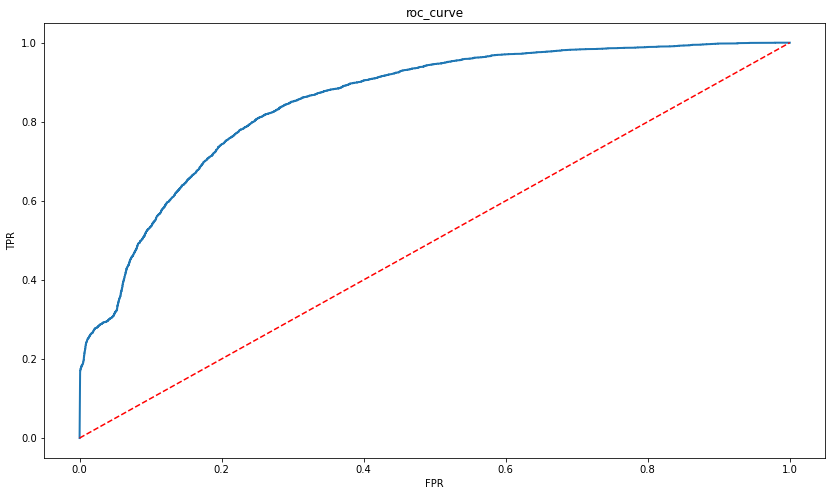

In [79]:
fpr,tpr,thresholds = roc_curve(y_encoded, model.predict_proba(test_x)[:,1])
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'r--')
plt.title('roc_curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [55]:
roc_auc = roc_auc_score(test_y, model.predict_proba(test_x)[:,1])

In [56]:
roc_auc

0.8523163898934146